# ORCA 4500 : Foundations of Data Science - Homework 2

Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import bernoulli
from scipy.stats import uniform

Problem - 5

The distribution remains same for Y close to 0 and 1 and is unaffected by changing m. However, the distribution keeps on changing for 0.2 < Y < 0.8. 

Text(0.5, 1.0, 'm = 250')

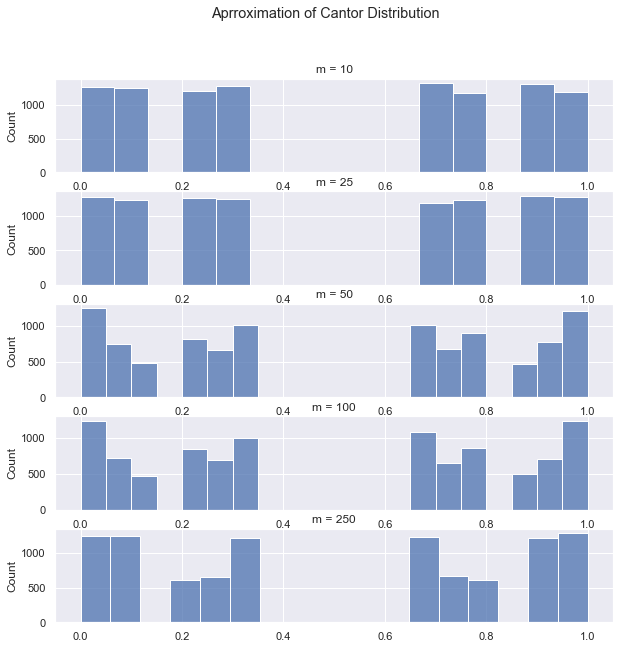

In [82]:
def cantor_dist(n,m):     
    #np.random.seed(123)
    var = np.zeros((n,m))
    X = bernoulli(p=0.5).rvs(size=(n,m))
    a = np.arange(start=1,stop=m+1,step=1)      
    b = 3*np.ones(m)                            
    denom = np.power(b,a)
    denom_mat = np.concatenate([[denom]]*n)
    var= np.divide(X,denom_mat)
    Y = 2*np.sum(var,axis=1)
    return Y


n = 10000
m = np.array([10,25,50,100,250])

sns.set()
fig,axes = plt.subplots(5,1, figsize=(10,10))
fig.suptitle('Aprroximation of Cantor Distribution')

y_sol_1 = cantor_dist(n,m[0])
sns.histplot(ax=axes[0],x=y_sol_1)
axes[0].set_title('m = 10')
y_sol_2 = cantor_dist(n,m[1])
sns.histplot(ax=axes[1],x=y_sol_2)
axes[1].set_title('m = 25')
y_sol_3 = cantor_dist(n,m[2])
sns.histplot(ax=axes[2],x=y_sol_3)
axes[2].set_title('m = 50')
y_sol_4 = cantor_dist(n,m[3])
sns.histplot(ax=axes[3],x=y_sol_4)
axes[3].set_title('m = 100')
y_sol_5 = cantor_dist(n,m[4])
sns.histplot(ax=axes[4],x=y_sol_5)
axes[4].set_title('m = 250') 

Problem - 6

In [33]:
x = np.arange(start=1,stop=5,step=1)
print(x)
pmf = [0.2,0.4,0.1,0.3]
n = 50

[1 2 3 4]


In [34]:
def distribution(x,pmf,n):
    u = uniform.rvs(0,1,size=(n,1))
    cdf = np.cumsum(pmf)
    cdf_mat = np.tile(cdf,(n,1))
    boolean = u < cdf_mat
    x_indices = np.argmax(boolean,axis=1)
    y = x[x_indices]
    return y

distribution(x,pmf,n)
    

array([2, 2, 4, 2, 2, 2, 4, 1, 2, 1, 2, 1, 2, 2, 1, 1, 4, 1, 4, 4, 2, 2,
       4, 1, 4, 1, 4, 2, 2, 1, 3, 4, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 4])

Problem - 7

We can clearly see that the mean and variance of the Cauchy Distribution does not converge. 

The Cauchy distribution has the remarkable property that the average of N samples, for any positive integer N, has the same distribution as the original distribution. The average will not settle down no matter how many samples you take. The graphs will look similar no matter how many samples we take.

In [67]:
arr = cauchy.rvs(size = 10000)
np.random.seed(123)
n_index = np.zeros(len(arr))
mean = np.zeros(len(arr))
var = np.zeros(len(arr))

for i in range(len(arr)):
    mean[i] = np.sum(arr[:i+1])/(i+1)
    var[i] = np.sum((arr[:i+2]-mean[i])**2)/(i+1)


Text(0, 0.5, 'Variance')

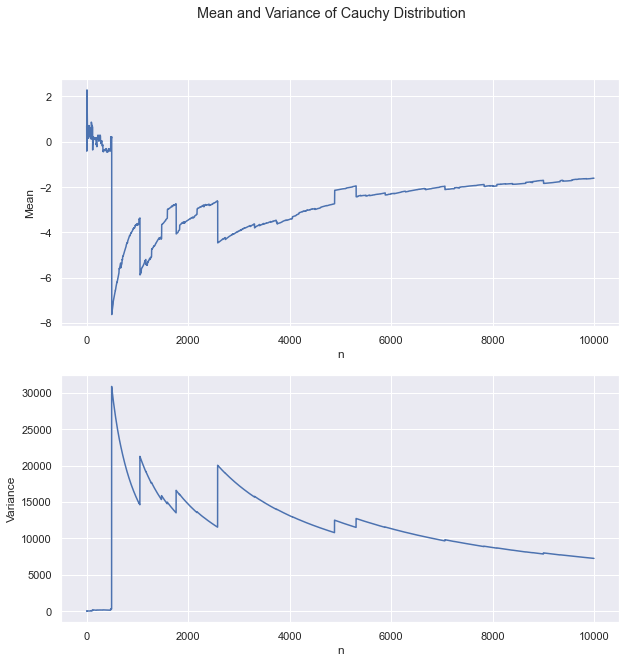

In [68]:
fig,axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle('Mean and Variance of Cauchy Distribution')

plt.subplot(2,1,1)
plt.plot(mean)
plt.xlabel('n')
plt.ylabel('Mean')
plt.subplot(2,1,2)
plt.plot(var[1:])
plt.xlabel('n')
plt.ylabel('Variance')

NOTE : The Cauchy distribution does have a median, and the sample median converges to that median.